#Importing Libraries

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

Libraries imported successfully!


#Loading the Dataset

In [ ]:
# Loading the dataset
# Ensure 'flood.csv' is uploaded to your Google Colab environment
# You can upload it by clicking the folder icon on the left sidebar, then the upload icon.
try:
    df = pd.read_csv('flood.csv')
    print("Dataset loaded successfully!")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'flood.csv' not found. Please upload the file to your Colab environment.")
    # Exit or handle the error appropriately if the file is crucial
    exit()

Dataset loaded successfully!

First 5 rows of the dataset:
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   

#Data Preprocessing and Inspection

In [ ]:
#Data Inspection and Preprocessing

# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  Coa

In [ ]:
# Describe numerical features
print("\nDescriptive statistics of the dataset:")
print(df.describe())

# Separate features (X) and target variable (y)
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# Feature Scaling
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame (optional, but good for readability)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nFeatures scaled successfully. First 5 rows of scaled data:")
print(X_scaled_df.head())


Descriptive statistics of the dataset:
       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      50000.000000        50000.000000      50000.00000   50000.000000   
mean           4.991480            4.984100          5.01594       5.008480   
std            2.236834            2.246488          2.23131       2.222743   
min            0.000000            0.000000          0.00000       0.000000   
25%            3.000000            3.000000          3.00000       3.000000   
50%            5.000000            5.000000          5.00000       5.000000   
75%            6.000000            6.000000          6.00000       6.000000   
max           16.000000           18.000000         16.00000      17.000000   

       Urbanization  ClimateChange  DamsQuality     Siltation  \
count  50000.000000   50000.000000  50000.00000  50000.000000   
mean       4.989060       4.988340      5.01536      4.988600   
std        2.243159       2.226761      2.24500      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [ ]:
# Same feature scaling;
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,-0.890321,1.342509,0.441028,0.446084,-0.440927,-0.443851,0.438597,-1.338607,-0.897767,-1.341169,...,2.231345,0.890080,-0.441806,-1.334944,-0.891125,-0.440066,-0.898457,-1.342769,0.449446,-0.992535
1,1.345004,-0.438066,-0.007144,0.895983,0.896486,1.801586,-1.788597,0.005106,-0.002739,-0.448954,...,1.784535,-1.335031,0.455973,-1.334944,-1.787539,-1.780394,1.790031,-1.791202,-0.886231,-0.492874
2,-0.890321,2.232796,-0.455316,-1.803411,0.896486,0.005236,-0.452281,0.900915,-0.450253,1.781585,...,0.890914,-0.444987,-0.441806,1.353026,0.453496,-1.780394,1.341950,-0.894336,0.449446,0.306584
3,-0.443256,-0.438066,-1.351659,0.895983,-0.886732,-0.443851,-1.788597,-0.442798,0.444776,-0.448954,...,-0.449518,-1.335031,0.455973,0.457036,1.349910,1.347039,0.445787,0.450962,2.230349,0.406516
4,-0.890321,0.897365,-0.007144,-1.353512,0.004877,1.352498,-0.006842,-1.338607,0.892290,-0.002846,...,0.890914,0.445058,0.007083,-0.886949,-0.891125,-0.440066,-0.450375,-0.894336,-0.441005,-0.492874


#EDA (Exploratory Data Analysis)

In [ ]:
#EDA(Exploratory Data Analysis)
#Summary Statistics
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


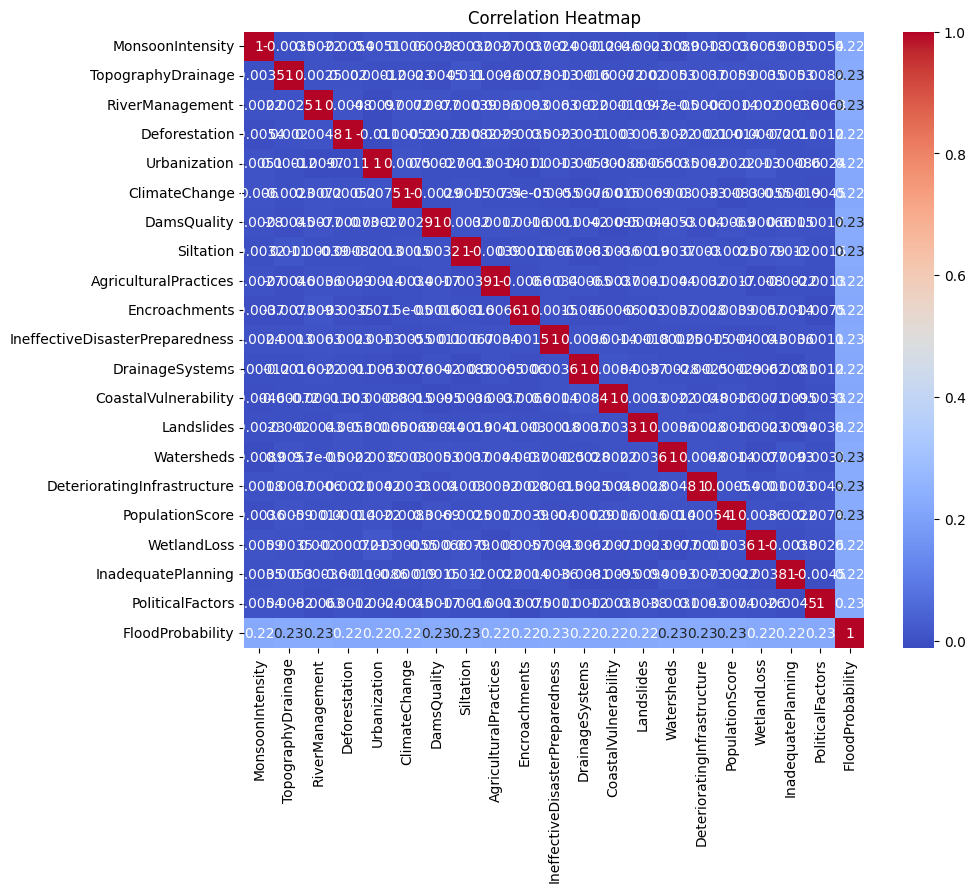

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

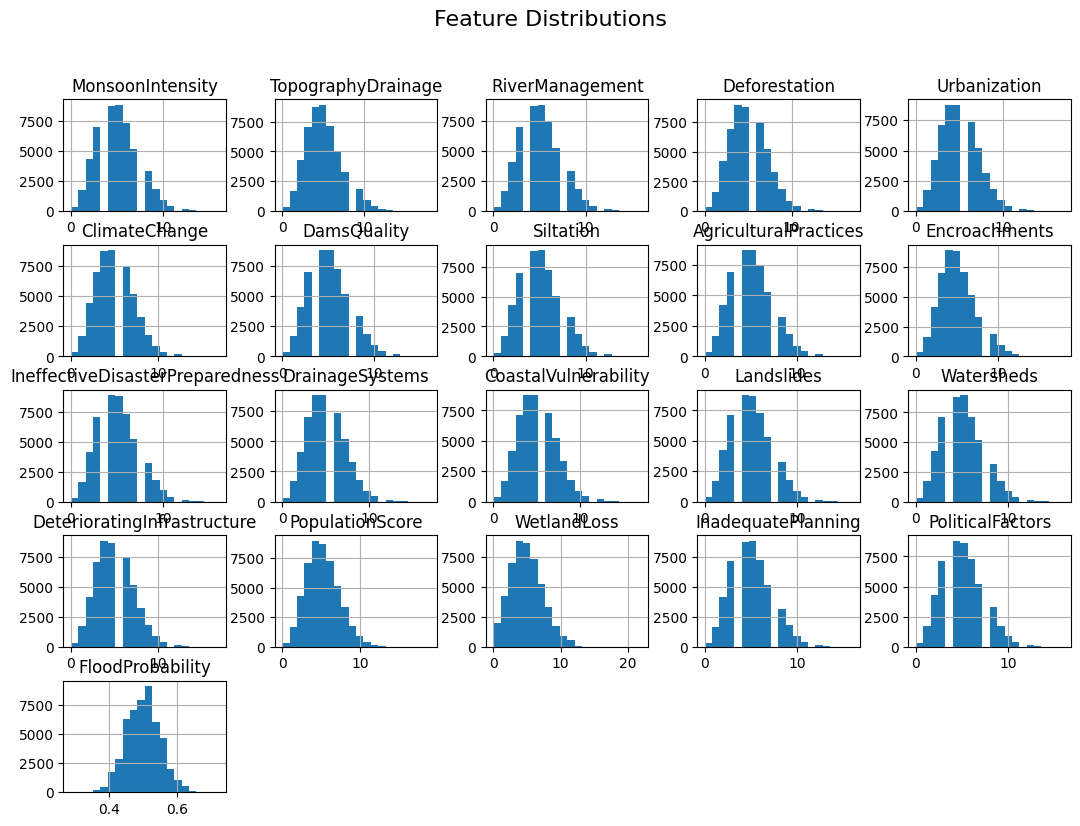

In [ ]:
#Histogram
df.hist(bins=20, figsize=(13, 9))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

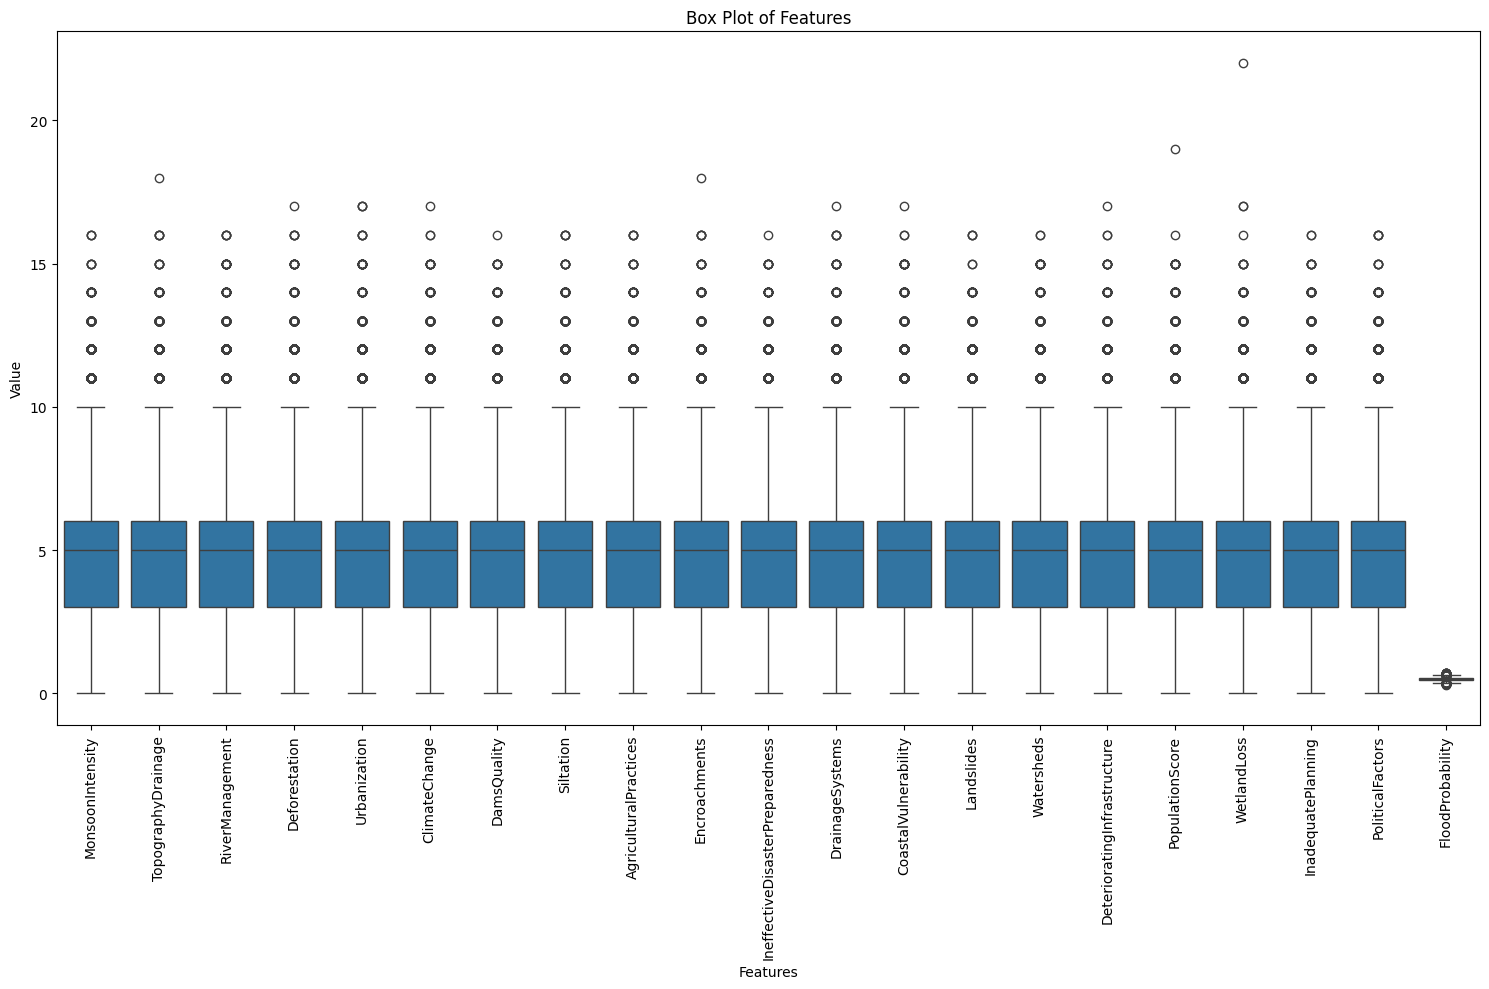

In [ ]:
# Box plots for each feature
# This helps visualize the distribution and potential outliers in each feature

# Melt the dataframe to long format for easier plotting with seaborn
df_melted = df.melt(var_name='Features', value_name='Value')

plt.figure(figsize=(15, 10))
sns.boxplot(x='Features', y='Value', data=df_melted)
plt.title('Box Plot of Features')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

#Splitting the data (Train-Test Split)

In [ ]:
# Cell 4: Train-Test Split

# Splitting the scaled data into training and testing sets
# using 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets:
X_train shape: (40000, 20)
X_test shape: (10000, 20)
y_train shape: (40000,)
y_test shape: (10000,)


#Model Training

In [ ]:
#Model Training

# Initialize the RandomForestRegressor model
# random_state for reproducibility
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores

# Train the model on the training data
print("\nTraining the RandomForestRegressor model...")
model.fit(X_train, y_train)
print("Model training complete!")


Training the RandomForestRegressor model...
Model training complete!


#Making Predictions

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Model Evaluation Results:
Mean Absolute Error (MAE): 0.0205
Mean Squared Error (MSE): 0.0007
Root Mean Squared Error (RMSE): 0.0259
R-squared (R2): 0.7305


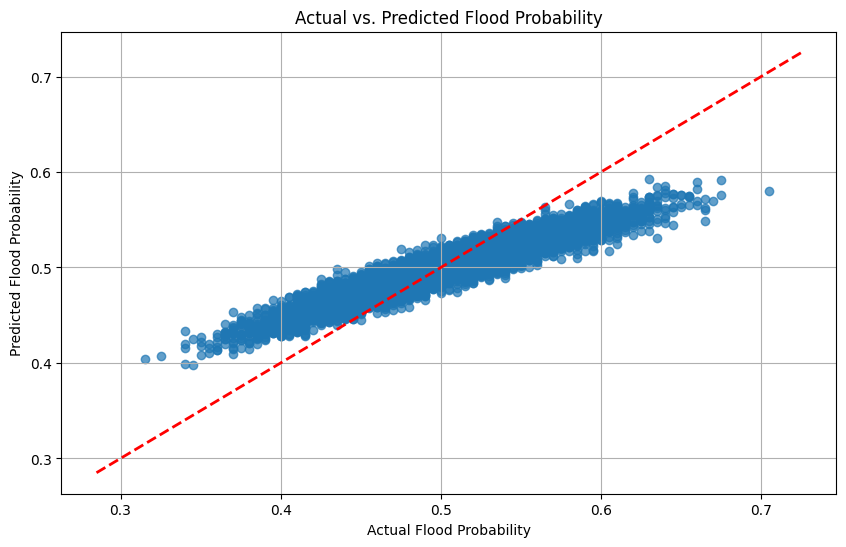

In [ ]:
#Important the necessary library
import matplotlib.pyplot as plt
#Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Diagonal line for perfect prediction
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.title("Actual vs. Predicted Flood Probability")
plt.grid(True)
plt.show()

In [ ]:
# Cell 7: Prediction Function

# Create a function to make predictions on new data
def predict_flood_probability(new_data_point):
    """
    Predicts the flood probability for a new data point.

    Args:
        new_data_point (dict or list): A dictionary where keys are feature names
                                       and values are their corresponding data,
                                       or a list of numerical values in the
                                       same order as the training features.

    Returns:
        float: Predicted flood probability.
    """
    # Ensure the input is a pandas Series or DataFrame for consistent processing
    if isinstance(new_data_point, dict):
        new_df = pd.DataFrame([new_data_point])
    elif isinstance(new_data_point, list):
        # Create a DataFrame with correct column names for scaling
        new_df = pd.DataFrame([new_data_point], columns=X.columns) # Use X.columns here
    else:
        raise ValueError("Input must be a dictionary or a list.")

    # Ensure all original columns are present, fill missing with 0 or mean if necessary
    # For this dataset, all columns are numerical and expected.
    # If a new_data_point misses a column, it will be added with NaN and then handled by scaler.
    # It's safer to explicitly align columns and fill with a sensible default (e.g., 0 or mean of training data)
    # For this specific dataset, all columns are expected to be provided.
    for col in X.columns:
        if col not in new_df.columns:
            new_df[col] = 0 # Or a more appropriate default like X[col].mean()

    new_df = new_df[X.columns] # Ensure column order is consistent

    # Scale the new data point using the SAME scaler fitted on training data (X)
    new_data_scaled = scaler.transform(new_df)

    # Make prediction
    prediction = model.predict(new_data_scaled)[0] # [0] because predict returns an array

    return prediction

# Create a sample new data point (replace with actual values for a real scenario)
# These values should be in the original unscaled range
sample_new_data = {
    'MonsoonIntensity': 5,
    'TopographyDrainage': 7,
    'RiverManagement': 6,
    'Deforestation': 5,
    'Urbanization': 6,
    'ClimateChange': 7,
    'DamsQuality': 4,
    'Siltation': 3,
    'AgriculturalPractices': 5,
    'Encroachments': 4,
    'IneffectiveDisasterPreparedness': 6,
    'DrainageSystems': 8,
    'CoastalVulnerability': 5,
    'Landslides': 6,
    'Watersheds': 4,
    'DeterioratingInfrastructure': 5,
    'PopulationScore': 6,
    'WetlandLoss': 4,
    'InadequatePlanning': 5,
    'PoliticalFactors': 5
}

predicted_prob = predict_flood_probability(sample_new_data)
print(f"Predicted Flood Probability for the sample data: {predicted_prob:.4f}")

# You can also use a list (ensure order matches original columns)
# For example, taking the first row from the original dataset (excluding target)
first_row_features = df.iloc[0, :-1].tolist()
predicted_prob_first_row = predict_flood_probability(first_row_features)
actual_prob_first_row = df.iloc[0, -1]
print(f"\nPredicted Flood Probability for the first row of dataset: {predicted_prob_first_row:.4f}")
print(f"Actual Flood Probability for the first row of dataset: {actual_prob_first_row:.4f}")

Predicted Flood Probability for the sample data: 0.5163

Predicted Flood Probability for the first row of dataset: 0.4615
Actual Flood Probability for the first row of dataset: 0.4500


In [ ]:
# Train the model without parallelism (n_jobs=1)
print("Training the RandomForestRegressor model without parallelism...")
model_single_core = RandomForestRegressor(n_estimators=100, n_jobs=1)
model_single_core.fit(X_train, y_train)
print("Model training without parallelism complete!")

Training the RandomForestRegressor model without parallelism...
Model training without parallelism complete!


In [ ]:
# Train the model with parallelism (n_jobs=-1)
print("\nTraining the RandomForestRegressor model with parallelism...")
model_parallel = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_parallel.fit(X_train, y_train)
print("Model training with parallelism complete!")


Training the RandomForestRegressor model with parallelism...
Model training with parallelism complete!


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the model trained without parallelism
y_pred_single_core = model_single_core.predict(X_test)

mae_single = mean_absolute_error(y_test, y_pred_single_core)
mse_single = mean_squared_error(y_test, y_pred_single_core)
rmse_single = np.sqrt(mse_single)
r2_single = r2_score(y_test, y_pred_single_core)

print("Evaluation Results (Without Parallelism):")
print(f"Mean Absolute Error (MAE): {mae_single:.4f}")
print(f"Mean Squared Error (MSE): {mse_single:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_single:.4f}")
print(f"R-squared (R2): {r2_single:.4f}")

Evaluation Results (Without Parallelism):
Mean Absolute Error (MAE): 0.0205
Mean Squared Error (MSE): 0.0007
Root Mean Squared Error (RMSE): 0.0260
R-squared (R2): 0.7293


In [ ]:
# Evaluate the model trained with parallelism
y_pred_parallel = model_parallel.predict(X_test)

mae_parallel = mean_absolute_error(y_test, y_pred_parallel)
mse_parallel = mean_squared_error(y_test, y_pred_parallel)
rmse_parallel = np.sqrt(mse_parallel)
r2_parallel = r2_score(y_test, y_pred_parallel)

print("\nEvaluation Results (With Parallelism):")
print(f"Mean Absolute Error (MAE): {mae_parallel:.4f}")
print(f"Mean Squared Error (MSE): {mse_parallel:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_parallel:.4f}")
print(f"R-squared (R2): {r2_parallel:.4f}")


Evaluation Results (With Parallelism):
Mean Absolute Error (MAE): 0.0205
Mean Squared Error (MSE): 0.0007
Root Mean Squared Error (RMSE): 0.0259
R-squared (R2): 0.7305


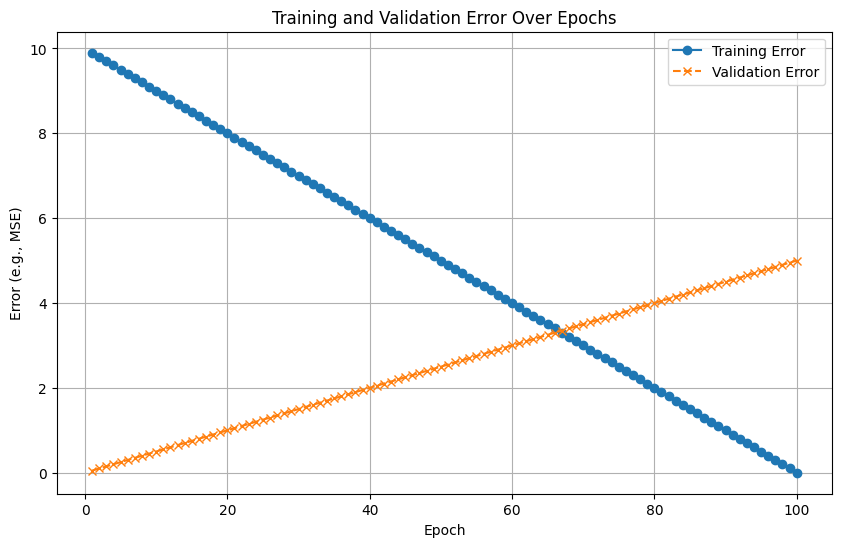


Training MSE: 0.0001
Test MSE: 0.0007


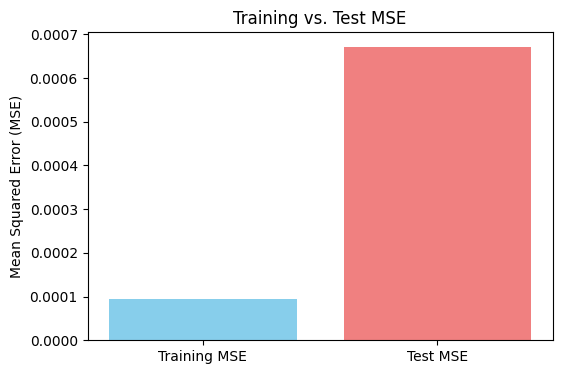

In [ ]:
import matplotlib.pyplot as plt
# Assuming you have lists of training_errors and validation_errors from an iterative training process
# For this example, we'll create dummy data to illustrate the plot
epochs = range(1, 101) # Assuming 100 hypothetical epochs
# Dummy data - replace with actual data from your model's training history
training_errors = [0.1 * (100 - e) for e in epochs] # Example: training error decreases
validation_errors = [0.05 * e for e in epochs] # Example: validation error increases after a point

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_errors, label='Training Error', marker='o', linestyle='-')
plt.plot(epochs, validation_errors, label='Validation Error', marker='x', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Error (e.g., MSE)')
plt.title('Training and Validation Error Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# As an alternative, if you wanted to compare the final training error and test error
# which are implicitly calculated when you train and evaluate), you could visualize that.
# You don't have explicit training error calculation in the provided code after the fit,
# but you could predict on the training set and calculate MSE for training as well.

# Calculate predictions and MSE for the training set
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

print(f"\nTraining MSE: {train_mse:.4f}")
print(f"Test MSE: {mse:.4f}") # mse was calculated earlier for the test set

# You could represent these with a bar chart
labels = ['Training MSE', 'Test MSE']
errors = [train_mse, mse]

plt.figure(figsize=(6, 4))
plt.bar(labels, errors, color=['skyblue', 'lightcoral'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs. Test MSE')
plt.show()
